# Machine Learning modelling of the Car Claims dataset

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('./data/carclaims.csv')

In [5]:
df.head()

,Serial No.,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [6]:
df.drop('Serial No.', axis=1, inplace=True)

In [7]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [8]:
df.shape

(15420, 33)

## Data Cleaning and Feature Engineering

In [9]:
df['Age_Group'] = pd.cut(df['Age'],bins=[0,9,19,29,39,49,59,69,79,89],labels=["0-9", "10-19","20-29","30-39","40-49","50-59", "60-69","70-79","80-89"])

In [10]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'Age_Group'],
      dtype='object')

In [11]:
df.drop(['WeekOfMonth', 'DayOfWeek', "Make", 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'PolicyNumber',
         'RepNumber', 'PastNumberOfClaims', 'DriverRating', 'Year'], inplace=True, axis=1)

In [12]:
df.columns

Index(['Month', 'AccidentArea', 'Sex', 'MaritalStatus', 'Age', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Deductible',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy', 'FraudFound', 'Age_Group'],
      dtype='object')

In [13]:
df.head()

,Month,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound,Age_Group
0,Dec,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",300,...,26 to 30,No,No,External,none,1 year,3 to 4,Liability,No,20-29
1,Jan,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",400,...,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,No,30-39
2,Oct,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",400,...,41 to 50,No,No,External,none,no change,1 vehicle,Collision,No,40-49
3,Jun,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",400,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,No,60-69
4,Jan,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",400,...,31 to 35,No,No,External,none,no change,1 vehicle,Collision,No,20-29


Month can be dropped since it does not affect out model. Also Vehicle category is already present in policy type, hence we can drop it as well. Similarily, base policy feature can also be removed.

In [14]:
df.drop(['Month', 'VehicleCategory', 'BasePolicy'], axis=1, inplace=True)

In [15]:
num_cols = df[['Age', 'Deductible']]
cat_cols = df.loc[:, ~df.columns.isin(['Age', 'Deductible'])]

In [16]:
num_cols.shape

(15420, 2)

In [17]:
cat_cols.shape

(15420, 18)

In [18]:
cat_cols.head()

,AccidentArea,Sex,MaritalStatus,Fault,PolicyType,VehiclePrice,Days:Policy-Accident,Days:Policy-Claim,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,FraudFound,Age_Group
0,Urban,Female,Single,Policy Holder,Sport - Liability,"more than 69,000",more than 30,more than 30,3 years,26 to 30,No,No,External,none,1 year,3 to 4,No,20-29
1,Urban,Male,Single,Policy Holder,Sport - Collision,"more than 69,000",more than 30,more than 30,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,No,30-39
2,Urban,Male,Married,Policy Holder,Sport - Collision,"more than 69,000",more than 30,more than 30,7 years,41 to 50,No,No,External,none,no change,1 vehicle,No,40-49
3,Rural,Male,Married,Third Party,Sedan - Liability,"20,000 to 29,000",more than 30,more than 30,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,No,60-69
4,Urban,Female,Single,Third Party,Sport - Collision,"more than 69,000",more than 30,more than 30,5 years,31 to 35,No,No,External,none,no change,1 vehicle,No,20-29


In [19]:
print(cat_cols['AccidentArea'].value_counts())
print(cat_cols['Sex'].value_counts())
print(cat_cols['PoliceReportFiled'].value_counts())
print(cat_cols['Fault'].value_counts())
print(cat_cols['WitnessPresent'].value_counts())
print(cat_cols['AgentType'].value_counts())
# 


Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
Male      13000
Female     2420
Name: Sex, dtype: int64
No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64
Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64
No     15333
Yes       87
Name: WitnessPresent, dtype: int64
External    15179
Internal      241
Name: AgentType, dtype: int64


In [33]:
# replacing 1 and 0 for above features
cat_cols['AccidentArea'] = cat_cols['AccidentArea'].map(dict(Urban=1, Rural=0))
cat_cols['Sex'] = cat_cols['Sex'].map(dict(Male=1, Female=0))
cat_cols['PoliceReportFiled'] = cat_cols['PoliceReportFiled'].map(dict(Yes=1, No=0))
cat_cols['WitnessPresent'] = cat_cols['WitnessPresent'].map(dict(Yes=1, No=0))

cat_cols['Fault'].replace(['Policy Holder', 'Third Party'],[1, 0], inplace=True)
cat_cols['AgentType'].replace(['External', 'Internal'],[1, 0], inplace=True)
cat_cols['FraudFound'].replace(['No', 'Yes'],[0, 1], inplace=True)

In [21]:
#AccidentArea, Sex, PoliceReportFiled, Fault, WitnessPresent, AgentType
print(cat_cols['AccidentArea'].value_counts())
print(cat_cols['Sex'].value_counts())
print(cat_cols['PoliceReportFiled'].value_counts())
print(cat_cols['Fault'].value_counts())
print(cat_cols['WitnessPresent'].value_counts())
print(cat_cols['AgentType'].value_counts())

1    13822
0     1598
Name: AccidentArea, dtype: int64
1    13000
0     2420
Name: Sex, dtype: int64
0    14992
1      428
Name: PoliceReportFiled, dtype: int64
1    11230
0     4190
Name: Fault, dtype: int64
0    15333
1       87
Name: WitnessPresent, dtype: int64
1    15179
0      241
Name: AgentType, dtype: int64


In [22]:
print(cat_cols['MaritalStatus'].value_counts())
print(cat_cols['PolicyType'].value_counts())
print(cat_cols['VehiclePrice'].value_counts())
print(cat_cols['Days:Policy-Accident'].value_counts())
print(cat_cols['Days:Policy-Claim'].value_counts())
print(cat_cols['AgeOfVehicle'].value_counts())
print(cat_cols['NumberOfSuppliments'].value_counts())
print(cat_cols['AddressChange-Claim'].value_counts())
#NumberOfCars
print(cat_cols['NumberOfCars'].value_counts())
# print(cat_cols['BasePolicy'].value_counts())



Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64
Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyType, dtype: int64
20,000 to 29,000    8079
30,000 to 39,000    3533
more than 69,000    2164
less than 20,000    1096
40,000 to 59,000     461
60,000 to 69,000      87
Name: VehiclePrice, dtype: int64
more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: Days:Policy-Accident, dtype: int64
more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: Days:Policy-Claim, dtype: int64
7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 

In [23]:
cat_dummies = pd.get_dummies(cat_cols[['MaritalStatus', 'PolicyType', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim',
                        'AgeOfVehicle', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Age_Group']])

In [24]:
cat_dummies.shape

(15420, 59)

In [25]:
cat_dummies.head()

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,...,NumberOfCars_more than 8,Age_Group_0-9,Age_Group_10-19,Age_Group_20-29,Age_Group_30-39,Age_Group_40-49,Age_Group_50-59,Age_Group_60-69,Age_Group_70-79,Age_Group_80-89
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
a = cat_cols[['AccidentArea', 'Sex', 'PoliceReportFiled', 'Fault', 'WitnessPresent', 'AgentType', 'FraudFound']]
cat_df = pd.concat([cat_dummies, a], axis=1)

In [35]:
cat_df.shape

(15420, 66)

In [36]:
main_df = pd.concat([cat_df, num_cols], axis=1)

In [37]:
main_df.shape

(15420, 68)

## Modelling

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score,KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import metrics

from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

In [38]:
main_df.columns

Index(['MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sedan - Liability', 'PolicyType_Sport - All Perils',
       'PolicyType_Sport - Collision', 'PolicyType_Sport - Liability',
       'PolicyType_Utility - All Perils', 'PolicyType_Utility - Collision',
       'PolicyType_Utility - Liability', 'VehiclePrice_20,000 to 29,000',
       'VehiclePrice_30,000 to 39,000', 'VehiclePrice_40,000 to 59,000',
       'VehiclePrice_60,000 to 69,000', 'VehiclePrice_less than 20,000',
       'VehiclePrice_more than 69,000', 'Days:Policy-Accident_1 to 7',
       'Days:Policy-Accident_15 to 30', 'Days:Policy-Accident_8 to 15',
       'Days:Policy-Accident_more than 30', 'Days:Policy-Accident_none',
       'Days:Policy-Claim_15 to 30', 'Days:Policy-Claim_8 to 15',
       'Days:Policy-Claim_more than 30', 'Days:Policy-Claim_none',
       'AgeOfVehicle_2 years

In [39]:
# Taking x,y values from data frame
y = main_df['FraudFound'].values
X = main_df.drop('FraudFound',axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=50, stratify=y)

### Decision Tree Model

Training accuracy : 0.9404236921746649
Test accuracy : 0.938780804150454
0.9394725464764375


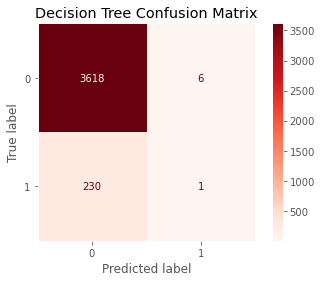

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3624
           1       0.14      0.00      0.01       231

    accuracy                           0.94      3855
   macro avg       0.54      0.50      0.49      3855
weighted avg       0.89      0.94      0.91      3855



In [46]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=6, random_state=15)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy : {dtc_train_acc}")
print(f"Test accuracy : {dtc_test_acc}")

#kfold cross vallidation

kfold = StratifiedKFold(n_splits=5)
cv = cross_val_score(dtc,X_train,y_train,cv=kfold)
print(np.mean(cv))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Decision Tree Confusion Matrix")
plt.grid(visible=False)
plt.show()

print(classification_report(y_test, y_pred))

### Random Forest Model

Training accuracy : 0.9401642888024211
Test accuracy : 0.9400778210116731
0.9405101599654129


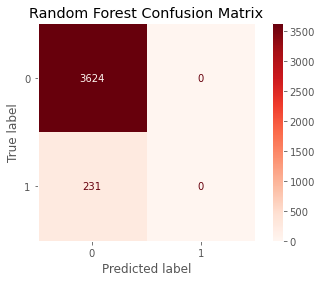

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3624
           1       0.00      0.00      0.00       231

    accuracy                           0.94      3855
   macro avg       0.47      0.50      0.48      3855
weighted avg       0.88      0.94      0.91      3855



In [47]:
#Random forest model

rfc = RandomForestClassifier(criterion='gini', max_depth=5,  n_estimators=6, n_jobs=3)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy : {rfc_train_acc}")
print(f"Test accuracy : {rfc_test_acc}")

#kfold cross vallidation

kfold = StratifiedKFold(n_splits=5)
cv = cross_val_score(rfc,X_train,y_train,cv=kfold)
print(np.mean(cv))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Random Forest Confusion Matrix")
plt.grid(visible=False)
plt.show()

print(classification_report(y_test, y_pred))

### XGBoost Model

Train accuracy : 0.9431906614785992
Test accuracy : 0.94189364461738
0.9424989191526156


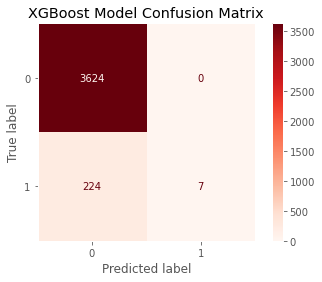

              precision    recall  f1-score   support

      stayed       0.94      1.00      0.97      3624
        left       1.00      0.03      0.06       231

    accuracy                           0.94      3855
   macro avg       0.97      0.52      0.51      3855
weighted avg       0.95      0.94      0.92      3855



In [48]:
xgbc = XGBClassifier(learning_rate=0.1, max_depth=4, booster='gbtree')
xgbc = xgbc.fit(X_train,y_train)
    
y_pred = xgbc.predict(X_test)
xgb_acc = accuracy_score(y_test,y_pred)
xgb_f1 = metrics.f1_score(y_pred,y_test,average='weighted')

print(f"Train accuracy : {accuracy_score(y_train,xgbc.predict(X_train))}")
print(f"Test accuracy : {xgb_acc}")

#kfold cross vallidation

kfold = StratifiedKFold(n_splits=5)
cv = cross_val_score(xgbc,X_train,y_train,cv=kfold)
print(np.mean(cv))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgbc.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("XGBoost Model Confusion Matrix")
plt.grid(visible=False)
plt.show()

print(classification_report(y_test, y_pred, target_names=['stayed', 'left']))